# HW Set 6 - Oscillations and Planets1

### Name:   James O thomas

#### Note: If a problem asks you to work things out for different initial conditions or timesteps, please first do your first choice in one cell, then copy your code with the new inputs into a new cell, etc.  Try to end up with a notebook that would be a complete solution if printed out.
---


In [1]:
%matplotlib inline

**Problem 1: Euler-Cromer Energy Conservation**

Investigate the stability of the Euler-Cromer method.  Modify our program so that it also calculates the total energy (kinetic plus potential) of the pendulum as a function of time.  Show that the energy is conserved over each complete cycle of the motion.


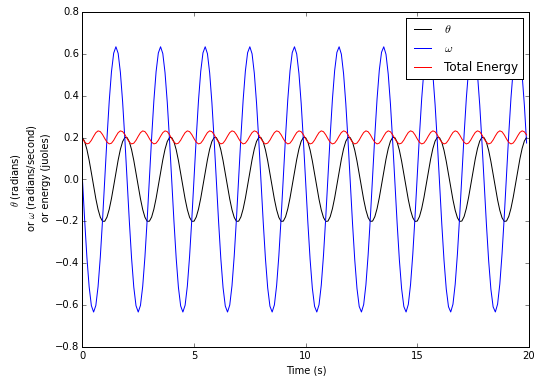

In [115]:
# Solution to problem 1
'''
modified version of:
Simple Pendulum - EulerCromer Method
by Dr. Wood

James O. Thomas
September 2015
'''
import numpy as np
import matplotlib.pylab as plt

# initialize variables
multiplier = 1.0
omega_init = 0
theta_init = 0.2
nsteps = int(200*multiplier)
g = 9.8
length = 1.0
dt = 0.1/multiplier

# new variables for the energy
m = 1      # kg  needed for the gravatational potential

omega = np.zeros(nsteps)
theta = np.zeros(nsteps)
energy = np.zeros(nsteps)
t = np.arange(0, nsteps*dt, dt)

omega[0] = omega_init
theta[0] = theta_init

for i in range(nsteps-1):
    omega[i+1] = omega[i] - (g/length)*theta[i]*dt
    theta[i+1] = theta[i] + omega[i+1]*dt           # Euler Cromer Method
    # energy[i] = 0.5*m*length**2*omega[i]**2 + m*g*length*(1-np.cos(theta[i]))
    
energy = 0.5*m*(length*omega)**2+m*g*length*(1-np.cos(theta))    

plt.figure(figsize = (8,6))
plt.plot(t,theta,'k-',label = r'$\theta $')
plt.plot(t,omega,'b-',label = r'$\omega $')
plt.plot(t, energy, 'r-', label = 'Total Energy')
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta $ (radians) '+'\n or $\omega $ (radians/second) \n or energy (juoles)') 
# the r (Latex) thing doesnt work with \n (new line) so I just used two strings
plt.legend()
plt.show()

In order to calculate the total energy we need the kinetic and potential energy. 

\begin{align}
E_{total} &= T + V \\
E_{total} &= \frac{1}{2}I\omega ^2 + mgh \\
E_{total} &= \frac{1}{2} m l^2 \omega ^2 + mgl(1-cos\theta )
\end{align}

When we plot the total energy (on the above graph) we can see that it is constant over each complete cycle of motion, but not necessarily constant within each period. This indicates that we may need to use smaller time steps. 

---


**Problem 2: Runge-Kutta method**  

Repeat the previous problem and the radioactive decay problem using a 4th order Runge-Kutta method that you code up yourself. See here for a writeup (or find your own source (note this webpage evidently has Java, so Chrome browser won't work completely)):  https://ece.uwaterloo.ca/~dwharder/NumericalAnalysis/14IVPs/rk/complete.html.

Compare the accuracy of the Runge-Kutta mechod with that of the Euler-Cromer algorithm using the same time step.

 

** the 4th order Runge-Kutta method **

The Runge-Kutta method is essentially sampling the slopes of a function at the endpoints as well as interior points of a given interval and then taking a weighted average of the samples.

The 4th order Runge-Kutta Method is given by:

$$y_{n+1} = y_n + \left( \frac{1}{6}k_1 + \frac{1}{3}k_2 + \frac{1}{3}k_3 + \frac{1}{6}k_4 \right) h + 0(h^5)$$

where:

\begin{align}
k_1 &= f(x_n , y_n) \\
k_2 &= f(x_n + \frac{1}{2}h , y_n + \frac{1}{2}k_1) \\
k_3 &= f(x_n + h , y_n + k_2) \\
k_4 &= f(x_n + h , y_n + k_3)
\end{align}

More information can be found at [wolfram](http://mathworld.wolfram.com/Runge-KuttaMethod.html), as well as [uwaterloo](https://ece.uwaterloo.ca/~dwharder/NumericalAnalysis/14IVPs/rk/complete.html).

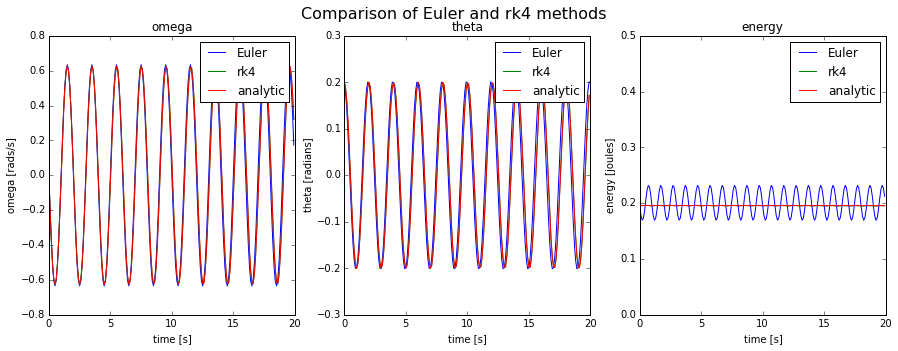

In [7]:
# Solution to problem 2 (pendulum)
'''
modified version of:
Simple Pendulum - EulerCromer Method
by Dr. Wood

James O. Thomas
October 2015
'''
import numpy as np
import matplotlib.pylab as plt

def RHS(y):
    # returns a vector of the derivatives
    return [y[1], -g/length*y[0]]

def Jrk4(f, h):
    
    k1 = RHS([f[0], f[1]])                               # use initial point
    k2 = RHS([f[0] + 0.5*k1[0]*h, f[1] + 0.5*k1[1]*h])   # one of the midpoints
    k3 = RHS([f[0] + 0.5*k2[0]*h, f[1] + 0.5*k2[1]*h])   # the other midpoint    
    k4 = RHS([f[0] + k3[0]*h, f[1] + k3[1]*h])           # the endpoint
    f_next = [f[0] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])*h/6, f[1] + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])*h/6]
    return f_next

# initialize variables
multiplier = 1.0
omega_init = 0
theta_init = 0.2
nsteps = int(200*multiplier)
g = 9.8
length = 1.0
dt = 0.1/multiplier

# new variables for the energy
m = 1      # kg  needed for the gravatational potential

omega_euler = np.zeros(nsteps)
theta_euler = np.zeros(nsteps)
energy_euler = np.zeros(nsteps)
rk4 = np.zeros((nsteps,2))     # [theta, omega]
energy_rk4 = np.zeros(nsteps)
t = np.arange(0, nsteps*dt, dt)

omega_euler[0] = omega_init
theta_euler[0] = theta_init
rk4[0,:] = [theta_init, omega_init]

for i in range(nsteps-1):
    omega_euler[i+1] = omega_euler[i] - (g/length)*theta_euler[i]*dt
    theta_euler[i+1] = theta_euler[i] + omega_euler[i+1]*dt           # Euler Cromer Method
    rk4[i+1] = Jrk4(rk4[i], dt)
    
# analytic solutions
# sines and cosines are switched from normal pendulum equation because of initial condition
theta_analytic = theta_init*np.cos(np.sqrt(g/length)*t)
omega_analytic = -theta_init*np.sqrt(g/length)*np.sin(np.sqrt(g/length)*t)

# calculate the energy
energy_euler = 0.5*m*(length*omega_euler)**2 + m*g*length*(1-np.cos(theta_euler))    
energy_rk4 = 0.5*m*(length*rk4[:,1])**2 + m*g*length*(1-np.cos(rk4[:,0]))   
energy_analytic = 0.5*m*(length*omega_analytic)**2 + m*g*length*(1-np.cos(theta_analytic))

plt.figure(figsize = (15,5))

ax1 = plt.subplot(131)
ax1.plot(t, omega_euler, label = 'Euler')
ax1.plot(t, rk4[:,1], label = 'rk4')
ax1.plot(t, omega_analytic, label = 'analytic')
ax1.set_ylabel('omega [rads/s]')
ax1.set_xlabel('time [s]')
l1 = plt.legend()
plt.title('omega')

ax2 = plt.subplot(132)
ax2.plot(t, theta_euler, label = 'Euler')
ax2.plot(t, rk4[:,0], label = 'rk4')
ax2.plot(t, theta_analytic, label = 'analytic')
ax2.set_ylabel('theta [radians]')
ax2.set_xlabel('time [s]')
l2 = plt.legend()
plt.title('theta')

ax3 = plt.subplot(133)
ax3.plot(t, energy_euler, label = 'Euler')
ax3.plot(t, energy_rk4, label = 'rk4')
ax3.plot(t, energy_analytic, label = 'analytic')
ax3.set_ylabel('energy [joules]')
ax3.set_xlabel('time [s]')
ax3.set_ylim(0,0.5)
l3 = plt.legend()
plt.title('energy')

plt.suptitle('Comparison of Euler and rk4 methods', size = 16)
plt.show()

When comparing the 4th order Runge-Kutta method to the Euler-Cromer method (and the analytical solution) we can see that there are not really any noticible differences in omega vs t or theta vs t. However, using the rk4 method did seem to get rid of all of the fluctuations in the energy when using a relatively large timestep.

**The radioactive decay problem:**

Consider a radioactive decay problem involving two types of nuclei
$A$ and $B$ with populations $N_A(t)$ and $N_B(t)$.  Suppose that type $A$ nuclei
decay to form type $B$ nuclei, when then also decay according to

\begin{align}
\frac{dN_A}{dt} &= -\frac{N_A}{\tau_A}\\
\frac{dN_B}{dt} &= \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B}
\end{align}

where $\tau_A$ and $\tau_B$ are the decay time constants for each time of nucleus.  Use the Euler method to solve these coupled equations for $N_A$ and $N_B$ as functions of time.  Explore the behavior found for different values of the ratio $\tau_A/\tau_B$.  

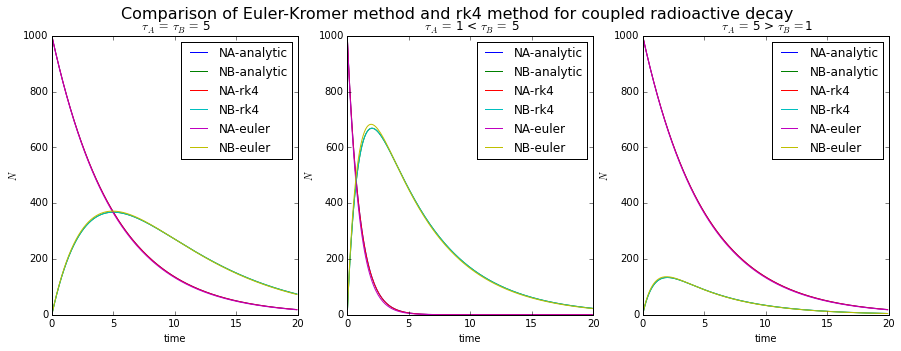

In [74]:
# Solution to problem 2 (radioactive decay)
'''
James O. Thomas
October 2015
'''
import matplotlib.pylab as plt
import numpy as np

def RHS(y):
    # returns vector of derivatives [dNA/dt, dNB/dt]
    return [-y[0]/tA, y[0]/tA - y[1]/tB]

def Jrk4(f, h):
    
    k1 = RHS([f[0], f[1]])                               # use initial point
    k2 = RHS([f[0] + 0.5*k1[0]*h, f[1] + 0.5*k1[1]*h])   # one of the midpoints
    k3 = RHS([f[0] + 0.5*k2[0]*h, f[1] + 0.5*k2[1]*h])   # the other midpoint    
    k4 = RHS([f[0] + k3[0]*h, f[1] + k3[1]*h])           # the endpoint
    f_next = [f[0] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])*h/6, f[1] + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])*h/6]
    return f_next

N0 = 1000
A = [5, 1, 5]       # time constant for type A
B = [5, 5, 1]       # time constant for type B
dt = 0.1
nsteps = 200

plt.figure(figsize = (15,5))

for j in range(len(A)):
    tA = A[j]
    tB = B[j]
    rk4 = np.zeros((nsteps,2))
    NA_euler = np.zeros(nsteps)
    NB_euler = np.zeros(nsteps)
    NA_analytic = np.zeros(nsteps)
    NB_analytic = np.zeros(nsteps)
    t = np.zeros(nsteps)
    rk4[0,:] = [N0,0]
    NA_euler[0] = N0
    NB_euler[0] = 0
    NA_analytic[0] = N0
    NB_analytic[0] = 0
    
    for i in range(nsteps-1):
        rk4[i+1] = Jrk4(rk4[i],dt)
        t[i+1] = t[i] + dt
        NA_euler[i+1] = NA_euler[i] - NA_euler[i]*dt/tA
        NB_euler[i+1] = NB_euler[i] - NB_euler[i]*dt/tB + NA_euler[i]*dt/tA
        NA_analytic[i+1] = N0*np.exp(-t[i+1]/tA)
        if tA != tB:
            NB_analytic[i+1] = N0/tA*(1/(1/tB - 1/tA))*(np.exp(-t[i+1]/tA)-np.exp(-t[i+1]/tB))
        else:
            NB_analytic[i+1] = N0/tA*t[i+1]*np.exp(-t[i+1]/tA)
    
    ax = plt.subplot(1, 3, j+1)
    ax.plot(t,NA_analytic, label = 'NA-analytic')
    ax.plot(t,NB_analytic, label = 'NB-analytic')
    ax.plot(t, rk4[:,0], label = 'NA-rk4')
    ax.plot(t, rk4[:,1], label = 'NB-rk4')
    ax.plot(t,NA_euler, label = 'NA-euler')
    ax.plot(t,NB_euler, label = 'NB-euler')
    ax.set_xlabel('time')
    ax.set_ylabel(r'$N$')
    if tA == tB:
        plt.title(r' $\tau _A =$ $\tau_B =$ '+str(tA))
    elif tA > tB:
        plt.title(r' $\tau_A =$ '+str(tA)+r' > $\tau_B = $'+str(tB))
    else:
        plt.title(r' $\tau _A =$ '+str(tA)+r' < $\tau_B =$ '+str(tB))
    plt.legend()
plt.suptitle('Comparison of Euler-Kromer method and rk4 method for coupled radioactive decay', size = 16)
plt.show()

As with the harmonic oscillator, there is some difference between the Euler-Kromer method and the 4th order Runge-Kutta method. The differences are not huge for this example, but they could be enough to cause problems for more difficult examples. For the conditions used here, I can not notice any difference between the rk4 method and the analytic solution. This indicates that the rk4 method is preferable to the Euler-Kromer method when accuracy is needed. The rk4 method, however, is harder to code and in many cases the Euler-Kromer method may be good enough.

---

**Problem 3: RK in SciPy ODE**

Next, do the above problem using the SciPy module scipy.integrate.ode.  The "dopri5" option calls a RK integrator.
http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.integrate.ode.html



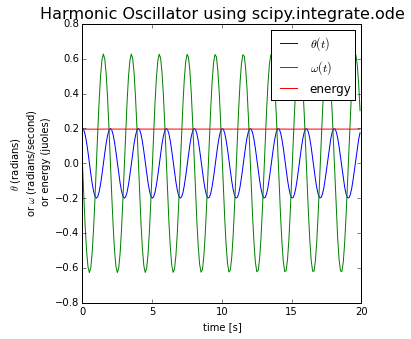

In [4]:
# Solution to problem 3 (pendulum)
'''
modified version of:
Simple Pendulum - EulerCromer Method
by Dr. Wood

James O. Thomas
October 2015
'''

import matplotlib.pylab as plt
import numpy as np
from scipy.integrate import ode
#ode.set_integrator('dopri5')

def f(t, y):
    return [y[1], -g/l*y[0]]      # [d(theta)/dt, d(omega)/dt]

# define some parameters
g = 9.81   # m/s
l = 1.0     # m
omega_init = 0
theta_init = 0.2
t_init = 0
# new variables for the energy
m = 1      # kg  needed for the gravatational potential

multiplier = 1.0
nsteps = int(200*multiplier)
dt = 0.1/multiplier

t = np.zeros(nsteps)
omega = np.zeros(nsteps)
theta = np.zeros(nsteps)
t[0] = t_init
omega[0] = omega_init
theta[0] = theta_init

# set up the integrator
r = ode(f).set_integrator('dopri5')
r.set_initial_value([theta_init, omega_init], t_init)

k = 1
while r.successful() and k < nsteps:
    r.integrate(r.t + dt)
    t[k] = r.t
    theta[k] = r.y[0]
    omega[k] = r.y[1]
    k = k + 1

energy = 0.5*m*(l*omega)**2+m*g*l*(1-np.cos(theta))   

# plot this and hope for the best
plt.figure(figsize = (5,5))
plt.title('Harmonic Oscillator using scipy.integrate.ode', size = 16)
plt.xlabel('time [s]')
plt.ylabel(r'$\theta $ (radians) '+'\n or $\omega $ (radians/second) \n or energy (juoles)') 
plt.plot(t,theta, label = r'$\theta (t)$')
plt.plot(t,omega, label = r'$\omega (t)$')
plt.plot(t,energy, label = 'energy')
plt.legend()
plt.show()

When using scipy.integrate.ode, a good result can be obtained even when using relatively large step sizes. In the above figure I used dt = 0.1 and got a result comparable to using dt = 0.001 for the Euler-Cromer method. Information about using the scipy.integrate.ode method of integration can be found [here](http://modelling3e4.connectmv.com/wiki/Software_tutorial/Integration_of_ODEs).

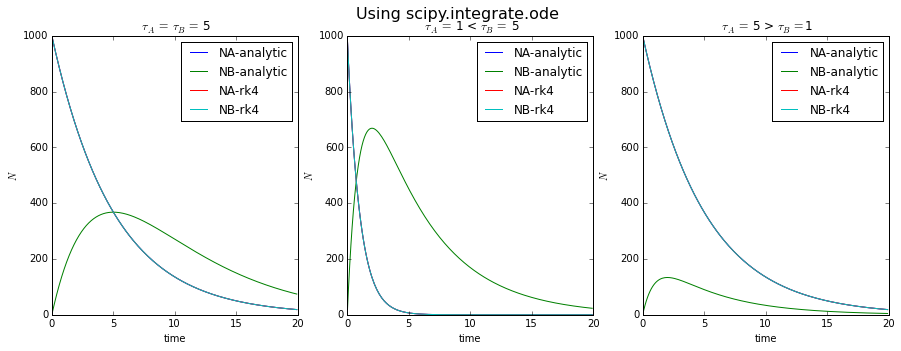

In [3]:
# Solution to problem 3, Radioactive decay
'''
James O. Thomas
October 2015
'''

import matplotlib.pylab as plt
import numpy as np
from scipy.integrate import ode

def f(t, y):
    return [-y[0]/tA, y[0]/tA - y[1]/tB]      # [d(NA)/dt, d(NB)/dt]

N0 = 1000
A = [5, 1, 5]       # time constant for type A
B = [5, 5, 1]       # time constant for type B
dt = 0.1
nsteps = 200

plt.figure(figsize = (15,5))

for j in range(len(A)):
    tA = A[j]
    tB = B[j]
    NA = np.zeros(nsteps)
    NB = np.zeros(nsteps)
    NA_analytic = np.zeros(nsteps)
    NB_analytic = np.zeros(nsteps)
    t = np.zeros(nsteps)
    NA[0] = N0
    NB[0] = 0
    NA_analytic[0] = N0
    NB_analytic[0] = 0
    
    # set up the integrator
    r = ode(f).set_integrator('dopri5')
    r.set_initial_value([N0, 0], 0)
    
    k = 1
    while r.successful() and k < nsteps:
        r.integrate(r.t + dt)
        t[k] = r.t
        NA[k] = r.y[0]
        NB[k] = r.y[1]
        NA_analytic[k] = N0*np.exp(-t[k]/tA)
        if tA != tB:
            NB_analytic[k] = N0/tA*(1/(1/tB - 1/tA))*(np.exp(-t[k]/tA)-np.exp(-t[k]/tB))
        else:
            NB_analytic[k] = N0/tA*t[k]*np.exp(-t[k]/tA)
        k = k + 1
        
    
    ax = plt.subplot(1, 3, j+1)
    ax.plot(t,NA_analytic, label = 'NA-analytic')
    ax.plot(t,NB_analytic, label = 'NB-analytic')
    ax.plot(t, NA, label = 'NA-rk4')
    ax.plot(t, NA, label = 'NB-rk4')
    ax.set_xlabel('time')
    ax.set_ylabel(r'$N$')
    if tA == tB:
        plt.title(r' $\tau _A =$ $\tau_B =$ '+str(tA))
    elif tA > tB:
        plt.title(r' $\tau_A =$ '+str(tA)+r' > $\tau_B = $'+str(tB))
    else:
        plt.title(r' $\tau _A =$ '+str(tA)+r' < $\tau_B =$ '+str(tB))
    plt.legend()
    
plt.suptitle('Using scipy.integrate.ode', size = 16)
plt.show()


As can be seen, the 4th order Runge-Kutta method matches the analytic solution quite well even for the relatively large step size of 0.1.

---

** Problem 4: Poincare Sections **

Write a program to calculate and compare the behavior of two nearly identical pendulums.  Use it to calculate the divergence of two nearby trajectories in the chaotic regime, and make a qualitative estimate of the corresponding Lyapunov exponent from the slope of a plot of $\ln(\Delta\theta)$ as a function of $t$. You can fit a line with np.polyfit().


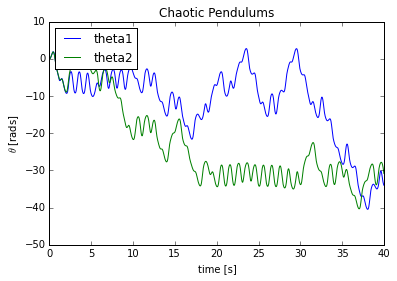

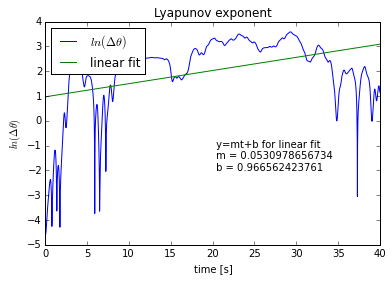

In [6]:
# Solution to problem 4
# need to be driven damped pendulums?
'''
James O. Thomas
October 2015
'''

import matplotlib.pylab as plt
import numpy as np
from scipy.integrate import ode

def f1(t, y):
    return[y[1], -2*beta*y[1] -omega_0**2*np.sin(y[0]) + A1*np.sin(Omega*t)]      # [d(theta)/dt, d(omega)/dt]

def f2(t, y):
    return[y[1], -2*beta*y[1] -omega_0**2*np.sin(y[0]) + A2*np.sin(Omega*t)]       # for second pundulum

# define some parameters (similar to classical mechanics book)
Omega = 2*np.pi  # driving frequency
beta = 3/4*np.pi   # b/(2m)
omega_0 = 3*np.pi # natural frequency = sqrt(g/l)  
gamma1 = 1.18 # related to amplitude of driving force = F_0/(mg)
gamma2 = 1.16
A1 = gamma1*omega_0**2 # related to amplitude of driving force = gamma omega_0^2 = F_0/(ml)
A2 = gamma2*omega_0**2

# initial values
omega_init1 = 0.0
theta_init1 = 0.0
omega_init2 = 0.0
theta_init2 = 0.0
t_init = 0

multiplier = 100.
nsteps = int(20*multiplier)
dt = 2/multiplier

# initialize arrays and set initial values
t1 = np.zeros(nsteps)
t2 = np.zeros(nsteps)
omega1 = np.zeros(nsteps)
theta1 = np.zeros(nsteps)
omega2 = np.zeros(nsteps)
theta2 = np.zeros(nsteps)
t1[0] = t_init
omega1[0] = omega_init1
theta1[0] = theta_init1
t2[0] = t_init
omega2[0] = omega_init2
theta2[0] = theta_init2

# set up the integrators
r1 = ode(f1).set_integrator('dopri5')
r1.set_initial_value([theta_init1, omega_init1], t_init)
r2 = ode(f2).set_integrator('dopri5')
r2.set_initial_value([theta_init2, omega_init2], t_init)

# integrate the 1st pendulum
k = 1
while r1.successful() and k < nsteps:
    r1.integrate(r1.t + dt)
    t1[k] = r1.t                      # should be the same values as the second integrator
    theta1[k] = r1.y[0]
    omega1[k] = r1.y[1]
    k = k + 1
    
# integrate the 2nd pendulum
k = 1
while r2.successful() and k < nsteps:
    r2.integrate(r2.t + dt)
    t2[k] = r2.t                      # t values should be the same, but just in case
    theta2[k] = r2.y[0]
    omega2[k] = r2.y[1]
    k = k + 1

# calculate the stuff for the Lyapunov exponent
lndtheta = np.log(np.abs(theta1 - theta2)+0.01)
m, b = np.polyfit(t1,lndtheta,1)
# print(m,b)

plt.figure()
plt.plot(t1, theta1, label = 'theta1')
plt.plot(t2, theta2, label = 'theta2')
plt.legend(loc = 'upper left')
plt.xlabel('time [s]')
plt.ylabel(r'$\theta $ [rads]')
plt.title('Chaotic Pendulums')
plt.show()

plt.figure()
plt.plot(t1,lndtheta, label = r'$ln (\Delta \theta )$')
plt.plot(t1, m*t1 + b, label = 'linear fit')
plt.title('Lyapunov exponent')
plt.legend(loc = 'upper left')
plt.xlabel('time [s]')
plt.ylabel(r'$ln (\Delta \theta )$')
plt.text(20,-2, ' y=mt+b for linear fit \n m = '+str(m)+' \n b = '+str(b))
plt.show()
       

**Solution to problem 4**

We can see from the second graph that the calculated Lyapunov exponent is $ \lambda \approx 0.05 $. The positive $ \lambda $ value indicates this is in the chaotic regime.

In order to find chaotic behavior in a pendulum, we need to remove several of the simplyfying assumptions that are used when we first study simple harmonic motion. First we need to remove the small angle approximation that was used. Without it, we have:

$$ \ddot{\theta } \propto sin(\theta) $$

We will also need to include a dissapative term of the form:

$$ F_{damp} \propto \dot{\theta} $$

Finally, we will also consider a driving force on the oscillator. For these purposes we will simply use a sinusoid, but the driving force could take any form in principle. 

$$ F_{drive} = F_0 sin( \Omega t) $$

Once we put all of this together, Newton's second law becomes

$$ ml \ddot{ \theta } = -bl\dot{\theta} - mg sin( \theta ) + F_0 sin( \Omega t ) $$

$$ \ddot{ \theta } = - \frac{b}{m} \dot{ \theta } - \frac{g}{l} sin( \theta ) + \frac{F_0 }{ml} sin( \Omega t) $$

We can redefine some constants to make this problem more tractable (and because my undergrad classical mechanics book did). 

\begin{align}
2 \beta &\equiv \frac{b}{m} \\
\omega_0^2 &\equiv \frac{g}{l} \\
\gamma & \equiv \frac{F_0}{mg} \\
\therefore \gamma \omega_0^2 &= \frac{F_0}{ml}
\end{align}

Plugging these into our DE yields:

$$ \ddot{ \theta } = -2\beta \dot{\theta} - \omega_0^2 sin( \theta ) = \gamma \omega_0^2 sin( \Omega t) $$

Splitting this into 2 first order DEs we get:

\begin{align}
\dot{\theta} &= \omega \\
\dot{\omega} &= -2\beta \omega - \omega_0^2 sin(\theta) + \gamma \omega_0^2 sin(\Omega t)
\end{align}

--- 

**Problem G1: Chaotic Attractor Detail**

Construct a very high-resolution plot of the chaotic attractor in the figure below, concentrating on the region $\theta > 2$ rad.  You should find that there is more structure in the attractor than is obvious on the scale in the figure.  In fact an important feature of chaotic attractors is that the coser you look, the more structure you find.  Hint: In order to get accurate results for a high resolution plot of the attractor, it is advisable, in terms of the necessary computer time, to use the Runge-Kutta method.  You may use your own routine or one of the built-in SciPy routines.

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/strangeattractor.png" />





........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

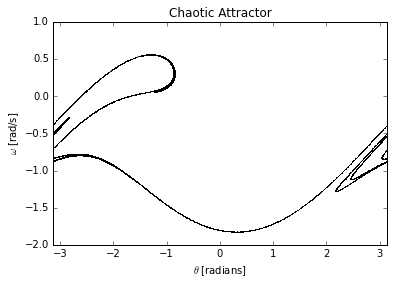

In [9]:
# Solution to problem G1
'''
James O. Thomas
October 2015
'''

import time
import matplotlib.pylab as plt
import numpy as np
from scipy.integrate import ode

def f(t, y):                           # y[theta, omega]
    return[y[1], -g/l*np.sin(y[0]) - q*y[1] + F_D*np.sin(omega_drive*t)]      # [d(theta)/dt, d(omega)/dt]

# define some parameters like Giordano book
g = 9.8
l = 9.8
omega_drive = 2./3.
dt = 0.005
q = 0.5
F_D = 1.2

# initial values
omega_init = 0.0
theta_init = 0.2
t_init = 0

nsteps = int(3e7)

omega = []   # empty list2
theta = []   

# set up the integrators
r = ode(f).set_integrator('dopri5')
r.set_initial_value([theta_init, omega_init], t_init)

# integrate the pendulum
start = time.time()
twopi = 2*np.pi
k = 0
n = 1
while r.successful() and k < nsteps:
    r.integrate(r.t + dt)
    t_val = r.t                      
    theta_val = r.y[0]
    omega_val = r.y[1]
    # only keep the points that are (almost) in phase with the driving force
    if np.abs(t_val - 2*n*np.pi/omega_drive) < dt/2:   # extra factor of 2 from Giordano book
        omega.append(omega_val)
        theta.append(theta_val%twopi)
        n = n + 1
    k = k + 1
    # show that it is doing something
    if k%2e4<0.01:
        print('.', end = '')
        
print('finished')
stop = time.time()
print('elapsed time is ', stop - start)
# change the domain from (0, 2pi) to (-pi, pi)
for i in range(len(theta)):
    if theta[i] > np.pi:
        theta[i] = theta[i] - 2*np.pi

print('number of points found = ',len(omega))
plt.figure()
plt.title('Chaotic Attractor')
plt.plot(theta,omega,'k,')
plt.xlabel(r'$\theta $ [radians]')
plt.xlim(-np.pi,np.pi)
plt.ylabel(r'$\omega $ [rad/s]')
plt.show()

# save the data to a text file so I dont have to regenerate the data to replot
file = open("theta_v_omega.txt", "w")
for index in range(len(theta)):
    file.write(str(theta[index]) + " " + str(omega[index]) + "\n")
file.close()

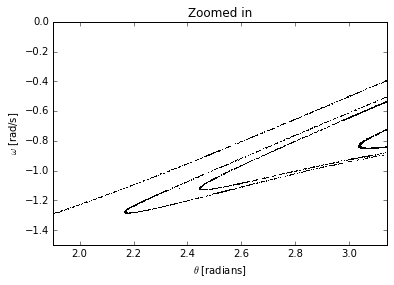

In [39]:
# Solution to problem G1: zoom in
'''
read in the txt file from the previous code and then make the necessary plots

James O. Thomas
October 2015
'''
import numpy as np

theta, omega = np.loadtxt('theta_v_omega.txt', unpack = True)

plt.figure()
plt.title('Zoomed in')
plt.xlabel(r'$\theta $ [radians]')
plt.ylabel(r'$\omega $ [rad/s]')
plt.xlim(1.9,np.pi)
plt.ylim(-1.5,0)
plt.plot(theta,omega, 'k,')
plt.show()

**Solution to problem G1**

The first program generated the values for the strange attractor. It should be noted that I had to add a factor of 2 into the Giordano book in order to only keep the points in phase with the driving force. Without the factor the program kept points in phase and those exactly out of phase.

The bottom code simply read in the values the first code saved to a txt file and then plotted the data on the appropriate scale. I chose to save the data points and read them in instead of regenerating them every time because it takes almost 50 minutes to generate the values for the specified parameters on my machine.

As expected, it can clearly be seen from the second plot that there is structure present in the zoomed in plot.

---
** Problem 5: Planetary Motion 1**

Investigate the results obtained from the planetary motion program with different values of the time step.  Show that for simulations of Earth, time steps greater than about $\Delta t = 0.01$ yr do not lead to satisfactory results.  For such large time steps the orbits are not stable (they do not close/repeat).  This is in accord with our general rule of thumb that the time step should be no larger than 1 percent or so of the characteristic time scale of the problem.  

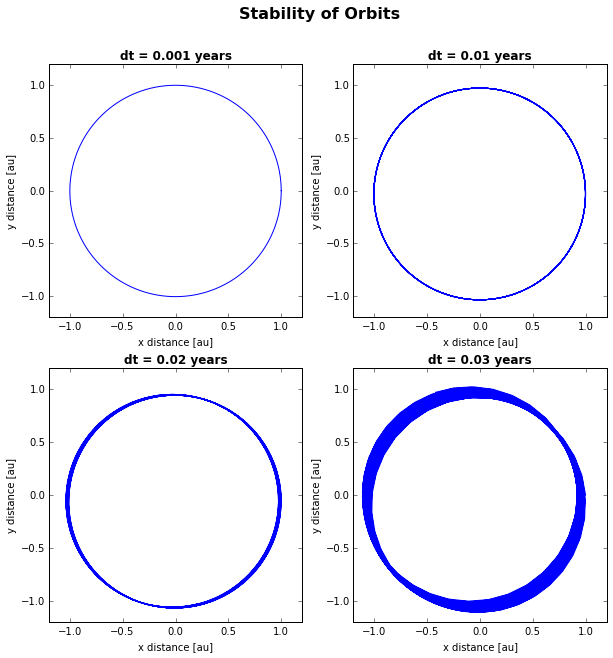

In [48]:
# Solution to problem 5
'''
Modified version of:
Sun-Earth Simulator
Euler-Cromer Method
By Dr. Wood

James O. Thomas
September 2015
'''
import numpy as np
import matplotlib.pylab as plt

def radius(a):
    return np.sqrt(a[0]**2 + a[1]**2)

# initialize
nsteps = 1000
delta_times = np.array([0.001, 0.01, 0.02, 0.03])

plt.figure(figsize = [10,10])

for j in range(len(delta_times)):
    dt = delta_times[j]
    pos = np.zeros([nsteps+1,2])
    vel = np.zeros([nsteps+1,2])
    
    pos[0,0] = 1
    pos[0,1] = 0
    vel[0,0] = 0
    vel[0,1] = 2*np.pi
    
    for i in range(nsteps):
        r = radius(pos[i])
        vel[i+1] = vel[i] - 4*np.pi**2*pos[i]/r**3*dt
        pos[i+1] = pos[i] + vel[i+1]*dt
    
    ax = plt.subplot(2,2,j+1)
    ax.plot(pos[:,0],pos[:,1],)
    ax.set_ylabel('y distance [au]')
    ax.set_xlabel('x distance [au]')
    ax.set_title('dt = '+str(round(dt, 5))+' years', size = 12, fontweight = 'bold')
    ax.set_ylim(-1.2,1.2)
    ax.set_xlim(-1.2,1.2)

plt.suptitle('Stability of Orbits', size = 16, fontweight = 'bold')
plt.show()

** Solution to problem 5 **

In the plots above we can compare the orbit of the sun-earth system (assuming a circular orbit) for different time steps. We can see that the top two plots are almost perfect circles. However, the bottom two start to show that the orbit deviates from circular over time. If we were to continue this simulation for longer, we will see the orbits become even less circular. This indicates that the orbits appear to be unstable and that we should be using an appropriate time step.

---
**Problem 6: Planetary Motion 2 **

Investigate the orbit of Hally's comet.  This comet has an orbital period of 76 yr and a distance of closest approach to the Sun of 0.59 AU. Use trial and error to determine its maximum orbital speed and maximum distance from the sun.  How does its maximum distance compare with the orbit of former planet Pluto? Note you'll need to insert some code to calculate the period of 1 orbit.  If you start on the X axis like we've been doing you can put a test in your loop to check if the previous Y value was negative and the current one positive, and if so, then print the time.

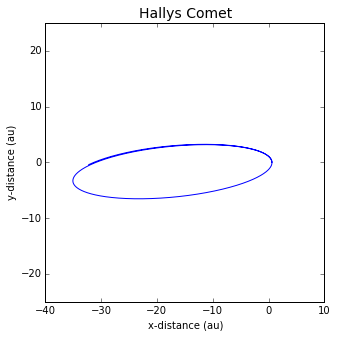

the orbital period is :  [75.85000000000001]  years
the maximum distance is :  35.2504951686  au


In [84]:
# Solution to problem 6
'''
Modified version of:
Sun-Earth Simulator
Euler-Cromer Method
By Dr. Wood

James O. Thomas
September 2015
'''
import numpy as np
import matplotlib.pylab as plt

def radius(a):
    return np.sqrt(a[0]**2 + a[1]**2)

# initialize
nsteps = 10000
dt = 0.01
pos = np.zeros([nsteps+1,2])
vel = np.zeros([nsteps+1,2])
t_rev = []    # empty array to store the points of complete revolutions
r_max = 0

pos[0,0] = 0.59   # au, closest approach
pos[0,1] = 0
vel[0,0] = 0
vel[0,1] = 11.445      # guess this 

for i in range(nsteps):
    r = radius(pos[i])
    vel[i+1] = vel[i] - 4*np.pi**2*pos[i]/r**3*dt
    pos[i+1] = pos[i] + vel[i+1]*dt
    if pos[i,1]<0 and pos[i+1,1]>0: # goes from positive to negative
        t_rev.append(i*dt)
    if r > r_max:   # store the max distance
        r_max = r
    
plt.figure(figsize = (5,5))
plt.plot(pos[:,0], pos[:,1])
plt.title('Hallys Comet', size = 14) # is there an easy way to put an apostrophe in the title string?
plt.xlabel('x-distance (au)')
plt.ylabel('y-distance (au)')
plt.xlim(-40,10)  # keep them scaled properly ie x_max - x_min = y_max - y_min
plt.ylim(-25,25)
plt.show()
print('the orbital period is : ',t_rev, ' years')
print('the maximum distance is : ',r_max, ' au')

The distance between Pluto and the sun at apehelion is about 49.7 au and the distance at perehelion is about 29.7 au. The average distance is about 39.5 au. This means that at its apehelion, Hally's comet is roughly the same distance as Pluto's average distance from the sun.

Data relating to the orbit of Pluto was found on the [NASA website](http://www.nasa.gov/audience/forstudents/5-8/features/nasa-knows/what-is-pluto-58.html).

---
** Problem 7: Conservation Laws **

Extend your orbit program so that it calculates the energy (kinetic, potential, and total) of the planet, and also the angular momentum.  Consider the following issues.

* (a) Begin with a circular orbit and show that both the kinetic and potential energy are constants.  The angular momentum should also be a constant.

* (b) Consider an elliptical orbit.  An orbit with an initial position 1 AU from the Sun and a velocity of 5 AU/yr is a convenient choice.  Show that while the kinetic and potential energies now vary as the planet moves throught its orbit, their sum (the total energy) is a constant. Also show that the angular momentum is a constant during the course of the orbit.  

** Derivation of kinetic energy, potential energy, and angular momentum **

We know from classical mechanics that the kinetic energy of a moving body is given by:

$$T = \frac{1}{2}mv^2 \propto \frac{1}{2}v^2 $$

Similarly, the potential energy is given by:

$$ U_{grav} = - \frac{GM_{sun}m_{earth}}{r} \propto \frac{GM_{sun}}{r} $$

The angular momentum is:

\begin{align}
\vec{L} &= \vec{r} \times \vec{p} \\
\vec{L} &= \vec{r} \times m \vec{v} \\
L &= rmv \\
L &\propto rv
\end{align}

Where we dropped the vector notation because $\vec{r}$ is always orthogonal to $\vec{v}$ for a circular orbit.

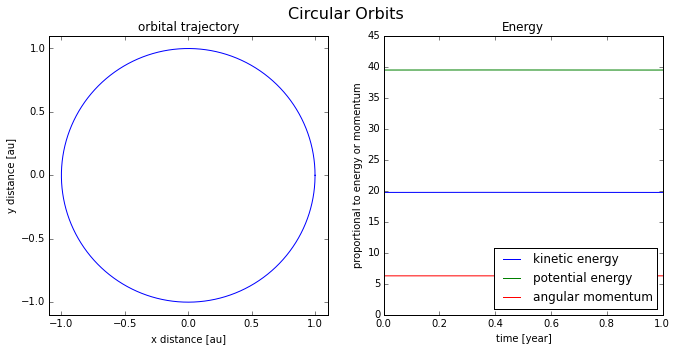

In [31]:
# solution to problem 7 a) circular orbits
'''
Modified version of:
Sun-Earth Simulator
Euler-Cromer Method
By Dr. Wood

James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

def radius(a):
    return np.sqrt(a[0]**2+a[1]**2)

# initialize
nsteps = int(1e4)
pos = np.zeros([nsteps + 1, 2])
vel = np.zeros([nsteps + 1, 2])
KE = np.zeros([nsteps])
PE = np.zeros([nsteps])
L = np.zeros([nsteps])
dt = 1e-4
t = np.arange(0,nsteps*dt,dt)

# initial values
pos[0,0] = 1
pos[0,1] = 0
vel[0,0] = 0
vel[0,1] = 2*np.pi

for i in range(nsteps):
    r = radius(pos[i])
    v = radius(vel[i])
    vel[i+1] = vel[i] - 4*np.pi**2*pos[i]/r**3*dt
    pos[i+1] = pos[i] + vel[i+1]*dt
    KE[i] = 0.5*v**2
    PE[i] = 4*np.pi**2/r
    L[i] = r*v
    
fig2 = plt.figure(figsize = (11,5))

ax1 = plt.subplot(121)
ax1.plot(pos[:,0],pos[:,1])
ax1.set_xlabel('x distance [au]')
ax1.set_ylabel('y distance [au]')
ax1.set_title('orbital trajectory', size = 12)
ax1.set_xlim(-1.1,1.1)
ax1.set_ylim(-1.1,1.1)

ax2 = plt.subplot(122)
ax2.plot(t,KE,label = 'kinetic energy')
ax2.plot(t,PE,label = 'potential energy')
ax2.plot(t,L,label = 'angular momentum')
ax2.set_ylabel('proportional to energy or momentum')
ax2.set_xlabel('time [year]')
ax2.set_title('Energy', size = 12)
ax2.set_ylim(0,45)
ax2.set_xlim(0,1)
l = plt.legend(loc = 'lower right')

plt.suptitle('Circular Orbits', size = 16 )
plt.show()

We can see from the above plot, that for a circular orbit the kinetic energy, potential energy, and angular momentum are all conserved throughout the motion.

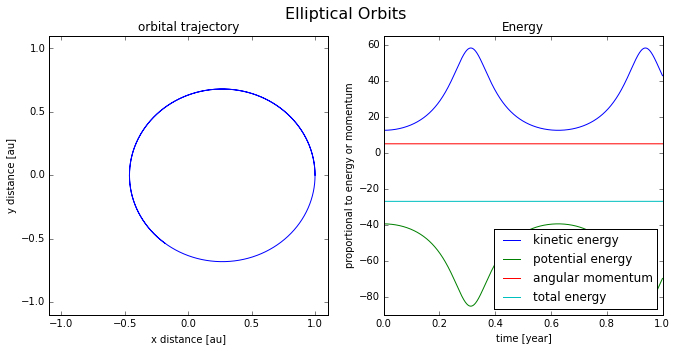

In [28]:
# solution to problem 7 b) elliptical orbits
'''
Modified version of:
Sun-Earth Simulator
Euler-Cromer Method
By Dr. Wood

James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

def radius(a):
    return np.sqrt(a[0]**2+a[1]**2)

# initialize
nsteps = int(1e4)
pos = np.zeros([nsteps + 1, 2])
vel = np.zeros([nsteps + 1, 2])
KE = np.zeros([nsteps])
PE = np.zeros([nsteps])
L = np.zeros([nsteps])
E = np.zeros([nsteps])
dt = 1e-4
t = np.arange(0,nsteps*dt,dt)

# initial values
pos[0,0] = 1
pos[0,1] = 0
vel[0,0] = 0
vel[0,1] = 5

for i in range(nsteps):
    r = radius(pos[i])
    v = radius(vel[i])
    vel[i+1] = vel[i] - 4*np.pi**2*pos[i]/r**3*dt
    pos[i+1] = pos[i] + vel[i+1]*dt
    KE[i] = 0.5*v**2
    PE[i] = -4*np.pi**2/r
    E[i] = KE[i]+PE[i]
    L[i] = np.linalg.norm(np.cross(pos[i],vel[i]))

fig2 = plt.figure(figsize = (11,5))

ax1 = plt.subplot(121)
ax1.plot(pos[:,0],pos[:,1])
ax1.set_xlabel('x distance [au]')
ax1.set_ylabel('y distance [au]')
ax1.set_title('orbital trajectory', size = 12)
ax1.set_xlim(-1.1,1.1)
ax1.set_ylim(-1.1,1.1)

ax2 = plt.subplot(122)
ax2.plot(t,KE,label = 'kinetic energy')
ax2.plot(t,PE,label = 'potential energy')
ax2.plot(t,L,label = 'angular momentum')
ax2.plot(t,E, label = 'total energy')
ax2.set_ylabel('proportional to energy or momentum')
ax2.set_xlabel('time [year]')
ax2.set_title('Energy', size = 12)
ax2.set_ylim(-90,65)
ax2.set_xlim(0,1)
l = plt.legend(loc = 'lower right')

plt.suptitle('Elliptical Orbits', size = 16 )
plt.show()

We can see from the above plots that for an elliptical orbit, the kinetic and potential energy vary throughout the orbit. However, the total mechanical energy and angular momentum are both constant throughout the motion.

---
** Problem G2: 2-Body Problem **

Consider now a binary star system where the masses of the 2 stars are comparable, so you must now allow for the motion of both stars.  Extend your code to include the motions of both stars.  Begin with a double star system in which the two objects have equal mass.  Then explore the behavior when the masses are unequal.  Hint: in order to obtain the simplest orbits, it is best to pick initial conditions such that the total linear momentum is zero.  

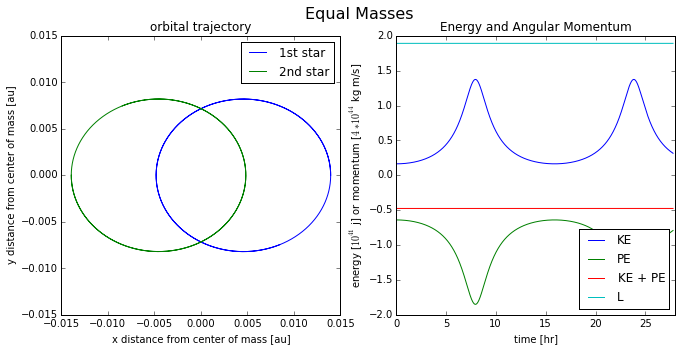

In [104]:
# solution to problem G2 equal masses
'''
Modified version of:
Sun-Earth Simulator
Euler-Cromer Method
By Dr. Wood

James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import norm

# use SI units so that the energy/momentum have units I know about
m1 = 2e30    # kg mass of the sun
m2 = 2e30
G = 6.67408e-11 # m^3 kg^-1 s^-2

# initialize
nsteps = int(10000)
pos1 = np.zeros([nsteps + 1, 2])
pos2 = np.zeros([nsteps + 1, 2])
vel1 = np.zeros([nsteps + 1, 2])
vel2 = np.zeros([nsteps + 1, 2])
KE = np.zeros([nsteps])
PE = np.zeros([nsteps])
L = np.zeros([nsteps])
dt = 10    # in seconds
t = np.arange(0,nsteps*dt,dt)

# initial values (I guessed until I got some closed orbits)
pos1[0,0] = 2.0865e9  
pos1[0,1] = 0.0
vel1[0,0] = 0.0
vel1[0,1] = 9.066e4    

pos2[0,0] = -2.0865e9
pos2[0,1] = 0.0
vel2[0,0] = 0.0
vel2[0,1] = -9.066e4  

for i in range(nsteps):
    mag_r = norm(pos2[i]-pos1[i])
    vel1[i+1] = vel1[i] - G*m2*(pos1[i]-pos2[i])/mag_r**3*dt
    vel2[i+1] = vel2[i] - G*m1*(pos2[i]-pos1[i])/mag_r**3*dt
    pos1[i+1] = pos1[i] + vel1[i+1]*dt
    pos2[i+1] = pos2[i] + vel2[i+1]*dt
    KE[i] = 0.5*m1*norm(vel1[i])**2 + 0.5*m2*norm(vel2[i])**2
    PE[i] = -G*m1*m2/mag_r
    L[i] = m1*(np.cross(pos1[i],vel1[i])) + m2*(np.cross(pos2[i],vel2[i]))

pos1 = pos1/1.496e11    # convert to au for plot
pos2 = pos2/1.496e11

KE = KE/1e41      # into easier number to work with
PE = PE/1e41
L = L/4e44

t = t/3600 # hours
    
fig2 = plt.figure(figsize = (11,5))

ax1 = plt.subplot(121)
ax1.plot(pos1[:,0],pos1[:,1], 'b', label = '1st star')
ax1.plot(pos2[:,0],pos2[:,1], 'g', label = '2nd star')
ax1.set_xlabel('x distance from center of mass [au]')
ax1.set_ylabel('y distance from center of mass [au]')
ax1.set_title('orbital trajectory', size = 12)
ax1.set_ylim(-0.015, 0.015)
ax1.set_xlim(-0.015, 0.015)
l = plt.legend()

ax2 = plt.subplot(122)
ax2.plot(t,KE, label = 'KE')
ax2.plot(t,PE, label = 'PE')
ax2.plot(t,KE + PE, label = 'KE + PE')
ax2.plot(t,L,label = 'L')
ax2.set_ylabel(r'energy [$10^{41}$ j] or momentum [$4*10^{44}$ kg m/s]')
ax2.set_xlabel('time [hr]')
ax2.set_title('Energy and Angular Momentum', size = 12)
ax2.set_ylim(-2,2)
ax2.set_xlim(0,28)
l = plt.legend(loc = 'lower right')

plt.suptitle('Equal Masses', size = 16 )
plt.show()

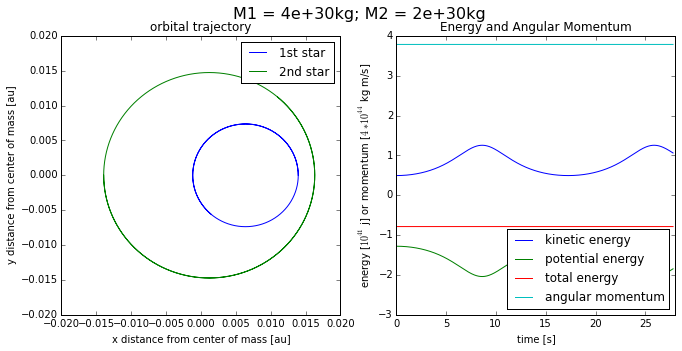

In [8]:
# Solution to G2 unequal masses
'''
Modified version of:
Sun-Earth Simulator
Euler-Cromer Method
By Dr. Wood

James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import norm

# use SI units so that the energy/momentum have units I know about
m1 = 2e30*2    # kg mass of the sun
m2 = 2e30
G = 6.67408e-11 # m^3 kg^-1 s^-2

# initialize
nsteps = int(10000)
pos1 = np.zeros([nsteps + 1, 2])
pos2 = np.zeros([nsteps + 1, 2])
vel1 = np.zeros([nsteps + 1, 2])
vel2 = np.zeros([nsteps + 1, 2])
KE = np.zeros([nsteps])
PE = np.zeros([nsteps])
L = np.zeros([nsteps])
dt = 10    # in seconds
t = np.arange(0,nsteps*dt,dt)

# initial values
pos1[0,0] = 2.0865e9 
pos1[0,1] = 0.0
vel1[0,0] = 0.0
vel1[0,1] = 9.066e4    

pos2[0,0] = -2.0865e9
pos2[0,1] = 0.0
vel2[0,0] = 0.0
vel2[0,1] = -9.066e4*2  

for i in range(nsteps):
    mag_r = norm(pos2[i]-pos1[i])
    vel1[i+1] = vel1[i] - G*m2*(pos1[i]-pos2[i])/mag_r**3*dt
    vel2[i+1] = vel2[i] - G*m1*(pos2[i]-pos1[i])/mag_r**3*dt
    pos1[i+1] = pos1[i] + vel1[i+1]*dt
    pos2[i+1] = pos2[i] + vel2[i+1]*dt
    KE[i] = 0.5*m1*norm(vel1[i])**2 + 0.5*m2*norm(vel2[i])**2
    PE[i] = -G*m1*m2/mag_r
    L[i] = m1*(np.cross(pos1[i],vel1[i])) + m2*(np.cross(pos2[i],vel2[i]))

pos1 = pos1/1.496e11    # convert to au for plot
pos2 = pos2/1.496e11

KE = KE/1e41      # into easier number to work with
PE = PE/1e41
L = L/4e44
t = t/3600      # to hours
    
fig2 = plt.figure(figsize = (11,5))

ax1 = plt.subplot(121)
ax1.plot(pos1[:,0],pos1[:,1], 'b', label = '1st star')
ax1.plot(pos2[:,0],pos2[:,1], 'g', label = '2nd star')
ax1.set_xlabel('x distance from center of mass [au]')
ax1.set_ylabel('y distance from center of mass [au]')
ax1.set_title('orbital trajectory', size = 12)
ax1.set_ylim(-0.02, 0.02)
ax1.set_xlim(-0.02, 0.02)
l = plt.legend()

ax2 = plt.subplot(122)
ax2.plot(t,KE, label = 'kinetic energy')
ax2.plot(t,PE, label = 'potential energy')
ax2.plot(t,KE + PE, label = 'total energy')
ax2.plot(t,L,label = 'angular momentum')
ax2.set_ylabel(r'energy [$10^{41}$ j] or momentum [$4*10^{44}$ kg m/s]')
ax2.set_xlabel('time [s]')
ax2.set_title('Energy and Angular Momentum', size = 12)
#ax2.set_ylim(0,45)
ax2.set_xlim(0,28)
l = plt.legend(loc = 'lower right')

plt.suptitle('M1 = '+str(m1)+'kg; M2 = '+str(m2)+'kg', size = 16 )
plt.show()

In order to calculate the orbits for a binary star system it was necessary to use the distance between the two stars in the calculations instead of the distance from the origin to the single star. In both cases I assumed that the center of mass was not moving and therefore total linear momentum was 0. In the first case, where m1 = m2, both stars traced out similar orbits. One orbit was simply a reflection of the other orbit. However, when the masses were different that symmetry was broken. In both cases I simply guessed at the initial conditions until I obtained a closed orbit. In both cases the orbital period was about 7 hours. That seems fast, but I do not know enough about binary systems to know whether or not that is unrealistic or not.

We can see that for both situaions above, the kinetic and potential energy of the system varies throughout the orbit. However, the total mechanical energy and angular momentum are both constant throughout the motion. 